In [1]:
# this lets us use the figures interactively
%matplotlib notebook

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString, Polygon
from cartopy.feature import ShapelyFeature
import cartopy.crs as ccrs
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import rtree # Import retree package to upports geospatial join
import shapefile as sf

plt.ion() # make the plotting interactive

# generate matplotlib handles to create a legend of the features we put in our map.
def generate_handles(labels, colors, edge='k', alpha=1):
    lc = len(colors)  # get the length of the color list
    handles = []
    for i in range(len(labels)):
        handles.append(mpatches.Rectangle((0, 0), 1, 1, facecolor=colors[i % lc], edgecolor=edge, alpha=alpha))
    return handles

# create a scale bar of length 20 km in the upper right corner of the map
# adapted this question: https://stackoverflow.com/q/32333870
# answered by SO user Siyh: https://stackoverflow.com/a/35705477
def scale_bar(ax, location=(0.92, 0.95)):
    llx0, llx1, lly0, lly1 = ax.get_extent(ccrs.PlateCarree())
    sbllx = (llx1 + llx0) / 2
    sblly = lly0 + (lly1 - lly0) * location[1]

    tmc = ccrs.TransverseMercator(sbllx, sblly)
    x0, x1, y0, y1 = ax.get_extent(tmc)
    sbx = x0 + (x1 - x0) * location[0]
    sby = y0 + (y1 - y0) * location[1]

    plt.plot([sbx, sbx - 20000], [sby, sby], color='k', linewidth=9, transform=tmc)
    plt.plot([sbx, sbx - 10000], [sby, sby], color='k', linewidth=6, transform=tmc)
    plt.plot([sbx-10000, sbx - 20000], [sby, sby], color='w', linewidth=6, transform=tmc)

    plt.text(sbx, sby-4500, '20 km', transform=tmc, fontsize=8)
    plt.text(sbx-12500, sby-4500, '10 km', transform=tmc, fontsize=8)
    plt.text(sbx-24500, sby-4500, '0 km', transform=tmc, fontsize=8)

In [2]:
# load the bedrock geology layer of Northern Ireland
bedrocks = gpd.read_file('data_files/bedrocks.shp')

In [3]:
print(bedrocks.head())

   MSLINK_0   LEX  ROCK                                       LEXICONDES  \
0      3678  SHRD  RHYD                          SHANE'S HILL RHYODACITE   
1      3678  SHRD  RHYD                          SHANE'S HILL RHYODACITE   
2      3659   UIG  RHYO            UNNAMED IGNEOUS INTRUSION, PALAEOGENE   
3      3663   TPR  RHYO  TEMPLEPATRICK RHYOLITE [OBSOLETE NAME AND CODE]   
4      3659   UIG  RHYO            UNNAMED IGNEOUS INTRUSION, PALAEOGENE   

                      ROCKDESC AGE  BGSREF        BGSTYPE   LEX_ROCK  \
0  RHYODACITE             1BAB  GP     703  250k_NI_SOLID  SHRD-RHYD   
1  RHYODACITE             1BAB  GP     703  250k_NI_SOLID  SHRD-RHYD   
2  RHYOLITE               1BAA   G     703  250k_NI_SOLID   UIG-RHYO   
3  RHYOLITE               1BAA  GP     703  250k_NI_SOLID   TPR-RHYO   
4  RHYOLITE               1BAA   G     703  250k_NI_SOLID   UIG-RHYO   

  MAJOR_ROCK             DERMOT  \
0       None  5. ACID VOLCANICS   
1       None  5. ACID VOLCANICS   
2    

<IPython.core.display.Javascript object>


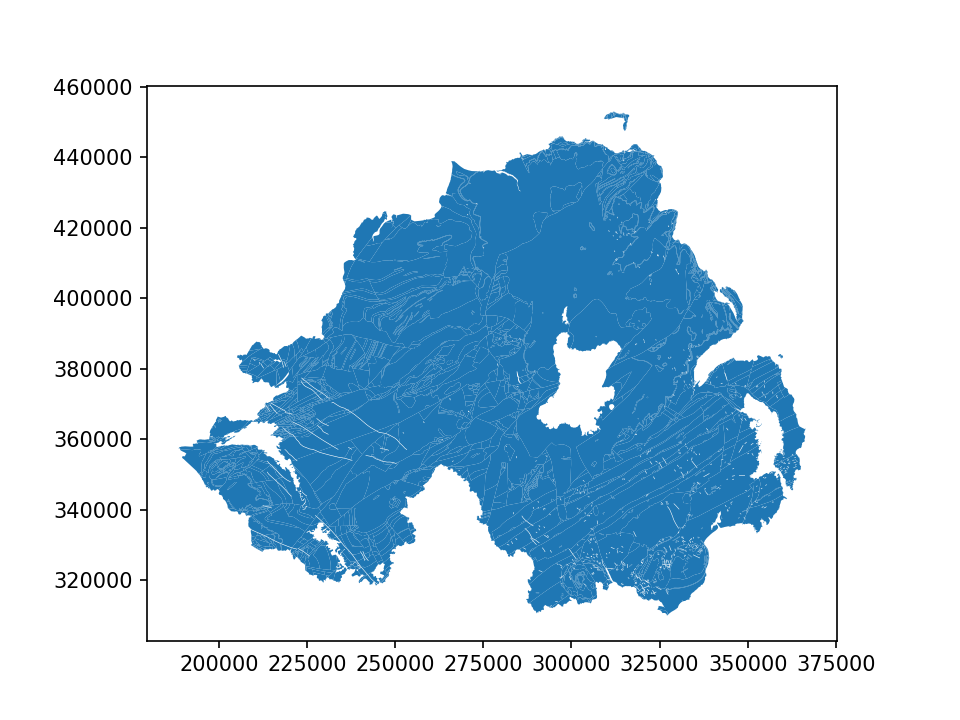

<AxesSubplot:>

In [4]:
bedrocks.plot()

<IPython.core.display.Javascript object>


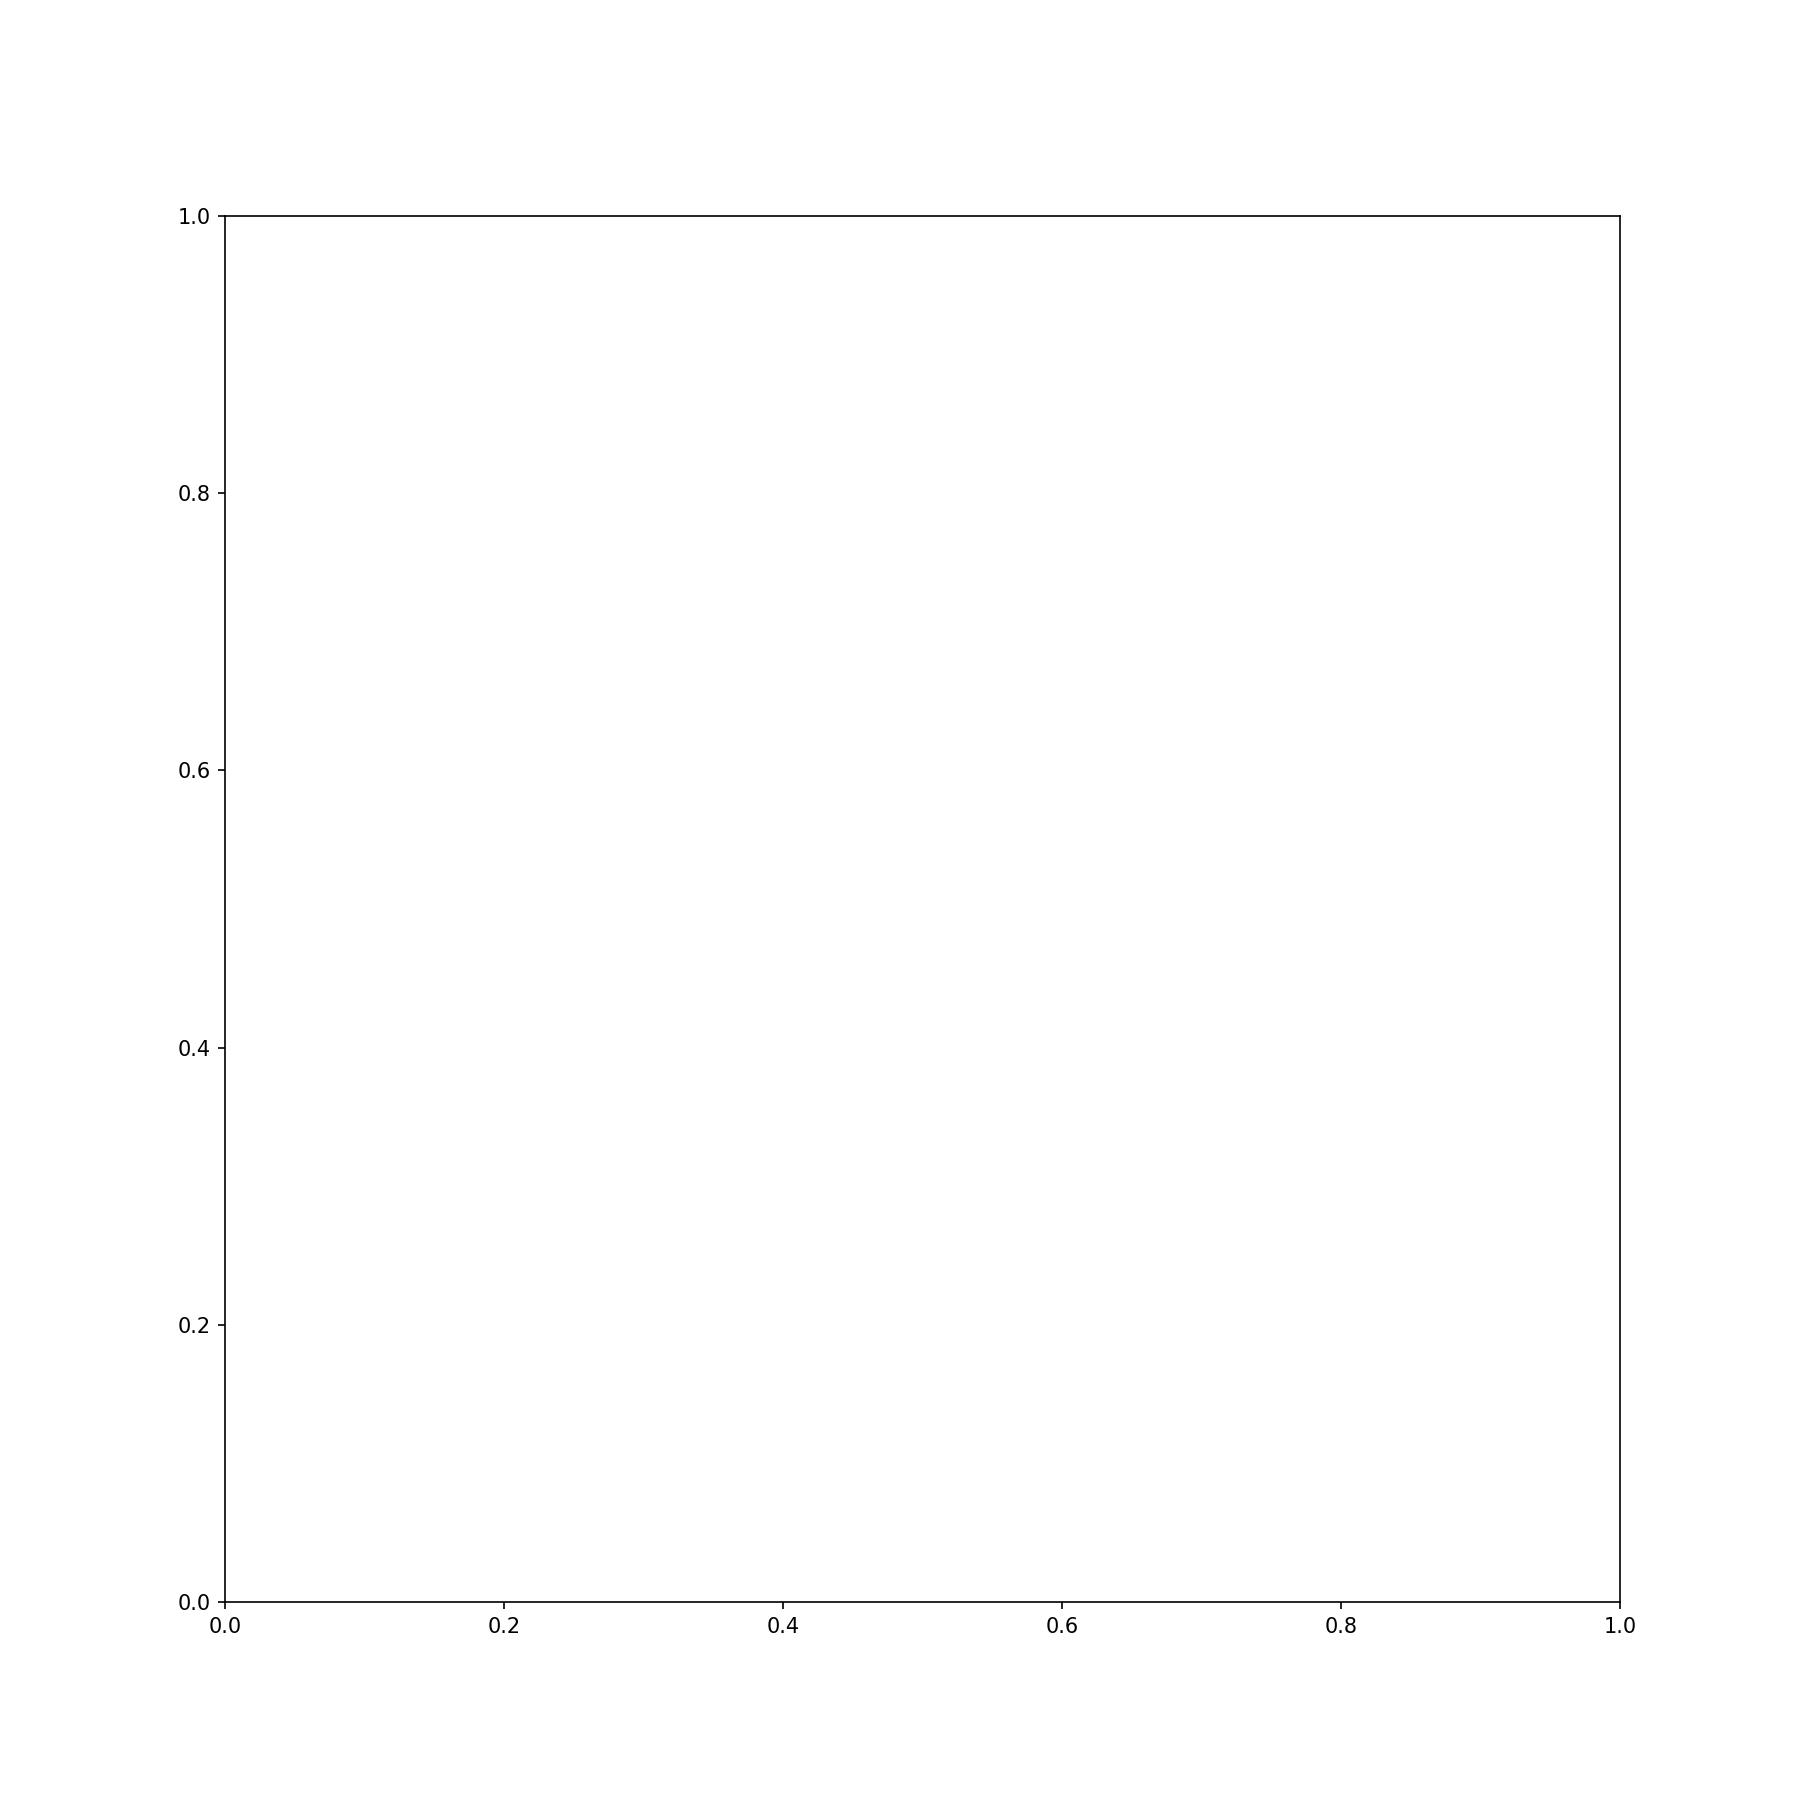

AttributeError: 'Reader' object has no attribute 'plot'

In [19]:
f, ax = plt.subplots(1, figsize=(12, 12))
ax = bedrocks.plot(axes=ax)
f.suptitle('Northern Ireland Bedrock Geology')
plt.show()

In [6]:
bedrocks = sf.Reader('data_files/bedrocks.shp')

In [7]:
with sf.Reader('data_files/bedrocks.shp') as shp:
    print(shp)

shapefile Reader
    2263 shapes (type 'POLYGON')
    2263 records (12 fields)


In [8]:
bedrocks.shapeType #Reading Shapefile Meta-Data, POLYGON = 5, https://pypi.org/project/pyshp/#reading-shapefiles

5

In [9]:
bedrocks.shapeType == sf.POLYGON #compare types more intuitively

True

In [10]:
bedrocks.shapeTypeName == 'POLYGON' #the name of the shape type as a string

True

In [11]:
len(bedrocks) #number of features

2263

In [12]:
bedrocks.bbox #bounding box area the shapefile covers

[188518.14839715767, 309938.890986756, 366414.3369967972, 452887.647]

In [13]:
shapes = bedrocks.shapes() #get a list of the shapefile's geometry by calling the shapes() method

In [14]:
fields = bedrocks.fields #get a list of the fields for the bedrocks, call the "fields" attribute

In [15]:
records = bedrocks.records() #get a list of the shapefile's records by calling the records() method

In [16]:
rec = bedrocks.record(3)

In [17]:
rec[1:3]

['TPR', 'RHYO']